# Explore Microsoft Buildings Data

Do the inspection lat/lon coords line up with buildings?

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

sys.path.append("../utils")

import config

### 2022 Inspected Parcels

In [3]:
# Import joined 2022 data
joined_2022_path = os.path.join(
    config.data_dir,
    "joined_inspections_parcels",
    "joined_2022.geojson",
)

joined_2022 = gpd.read_file(joined_2022_path)

In [5]:
# Import Microsoft Buildings dataset
buildings_path = os.path.join(
    config.data_dir,
    "microsoft_buildings",
    "California.geojson"
)
buildings_ca = gpd.read_file(buildings_path)

In [ ]:
buildings_ca.to_crs(config.geodetic_crs)
buildings_ca.shape

(11542912, 3)

#### Subset buildings to SB County

In [ ]:
pd.set_option("display.max_columns", None)

# Import SB county shape
counties = gpd.read_file(
    os.path.join(config.data_dir, "ca_counties", "CA_Counties.shp")
)
counties = counties.to_crs(config.geodetic_crs)
sb_county = counties.loc[counties["NAME"] == "Santa Barbara"]
bbox = [-125, 34.25, -119.0, 38.0]
sb_county = sb_county.clip(bbox)

# Subset buildings to Santa Barbara County
buildings = buildings_ca.sjoin(sb_county, predicate="intersects")

### Save subsetted buildings to file

located in "data/microsoft_buildings/sb_buildings.geojson"

In [ ]:
sb_buildings_path = os.path.join(
    config.data_dir, 
    "microsoft_buildings", 
    "sb_buildings.geojson"
    )
buildings.to_file(sb_buildings_path, driver="GeoJSON")

<Axes: >

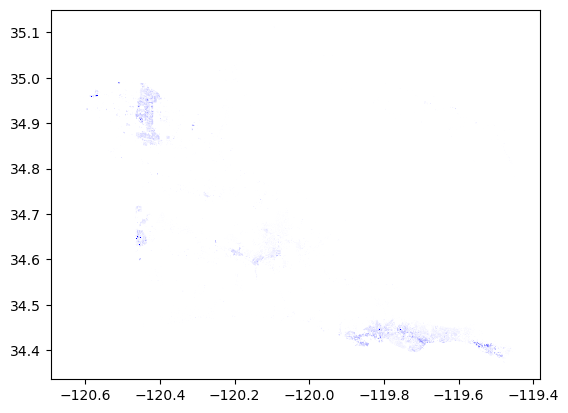

In [ ]:
buildings.plot(color="blue", label="Buildings", linewidth=0.1)

#### Check if inspections line up with buildings

In [ ]:
# Import inspections data
inspections_fp = os.path.join(
    config.data_dir,
    "inspections_data",
    "2022_defensible_space_inspections_SBC",
    "2022_defensible_space_inspections_SBC.shp",
)

inspections_2022 = gpd.read_file(inspections_fp)
inspections_2022.to_crs(config.geodetic_crs)

,fulcrum_id,created_at,updated_at,system_cre,system_upd,version,status,project,assigned_t,latitude,longitude,report_tit,globalid,keyid,propertyst,inspection,inspectorp,inspecti_1,addressvis,address_su,address_th,address__1,address_lo,address__2,address_ad,address_po,address_co,address_fu,calfireuni,county,community,community_,battalion,enginenumb,stationnam,shift,shift_juli,accessegre,occupantho,deliveryno,inspecti_2,a_removebr,b_removele,c_removede,d_removede,e_removefl,f_removefl,g_relocate,h_cutannua,i_removefu,j_exposedw,k_removede,l_removelo,m_outbuild,n_displaya,o_stovepip,recommendc,waterstora,water_sour,can_engine,water_stor,water_comm,structuret,structureh,roofconstr,eaves,ventscreen,exteriorsi,windowpane,deckporchg,deckporche,patiocover,fenceattac,propanetan,utilitymis,utilitym_1,nonhabitab,escalateto,reinspecti,citationnu,number_of_,photoid,photoid_ca,le100numbe,inspecti_3,coredata,firescopei,apn,yearbuilt,siteaddres,numberofst,appenddate,editstatus,calculated,calculat_1,calculat_2,textfield1,textfield2,numberfiel,numberfi_1,previousyr,previous_1,calculat_3,calculat_4,creationda,editdate,creator,editor,Date,geometry
0,48c58877-f0ce-438d-ac87-6434a2c15fe8,2022-02-14 10:44:17 PST,2022-05-24 12:22:14 PDT,2022-02-14 10:44:17 PST,2022-05-24 12:22:23 PDT,8.0,Compliant,None,None,34.461625,-119.772555,Defensible Space Inspection Report,None,NaN,None,None,Engine,2022-05-24,Yes - Without Reflective,4440,Shadow Hills Cir,None,Santa Barbara,Santa Barbara,CA,93105,US,4440 Shadow Hills Cir Santa Barbara Santa Barb...,SBC,SBA,San Marcos Foothills,None,1,NaN,13,A,144,Yes,No,Mailed,15,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,yes,Hydrant- Municipal/Public Water Supply,yes,None,None,Multi Family Residence Multi Story,Habitable,Tile,Enclosed,"Mesh Screen <= 1/8""",Other,Single Pane,Masonry/Concrete,Masonry/Concrete,Non Combustible,No Fence,Not Applicable,None,0,0,None,None,None,0.0,"eb994fe9-6273-444c-95b7-c3633b0876f5,de1dc62a-...",",,",NaN,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,2022-02-14,2022-02-14,None,None,2022-05-24,POINT (-119.77256 34.46163)
1,2f9d4c7c-54cb-415d-aae4-57f9b6c18994,2022-02-28 16:11:51 PST,2022-10-25 11:33:18 PDT,2022-02-28 16:11:51 PST,2022-10-25 11:34:34 PDT,6.0,Compliant,None,None,34.446105,-119.720859,Defensible Space Inspection Report,None,NaN,None,None,DSI,2022-10-25,Yes - Without Reflective,2928,La Combadura Rd,None,Santa Barbara,Santa Barbara,CA,93105,US,2928 La Combadura Rd Santa Barbara Santa Barba...,SBC,SBA,Mission Canyon,None,1,NaN,15,C,298,Yes,No,Email,15,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,yes,Hydrant- Municipal/Public Water Supply,yes,None,None,Single Family Residence Single Story,Habitable,Asphalt,Unenclosed,"Mesh Screen <= 1/8""",Stucco/Brick/Cement,Multi Pane,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,Not Observed,Not Applicable,<30',1,None,None,None,None,0.0,None,None,NaN,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,2022-02-28,2022-02-28,None,None,2022-10-25,POINT (-119.72086 34.4461)
2,f351800c-fc5c-4b79-bf24-a41775b74d7c,2022-04-05 13:47:06 PDT,2022-09-05 13:47:11 PDT,2022-04-05 13:47:06 PDT,2022-09-05 13:55:48 PDT,4.0,Compliant,None,None,34.672591,-120.108711,Defensible Space Inspection Report,None,0.0,None,None,DSI,2022-08-31,Yes - Without Reflective,3110 A,Acampo Rd,None,Santa Ynez,Santa Barbara,CA,93441,US,3110 A Acampo Rd Santa Ynez Santa Barbara CA 9...,SBC,SBA,Los Olivos,None,3,32.0,Santa Ynez Valley (Outside Engine Co. Area),C,248,Yes,No,Hardcopy,15,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,yes,Hydrant- Municipal/Public Water Supply,yes,None,None,Single Family Residence Single Story,Habitable,Tile,Unenclosed,No Vents,Stucco/Brick/Cement,Single Pane,Masonry/Concrete,No Deck/Porch,Combustible,Combustible,Not Applicable,None,0,0,None,None,None,0.0,None,None

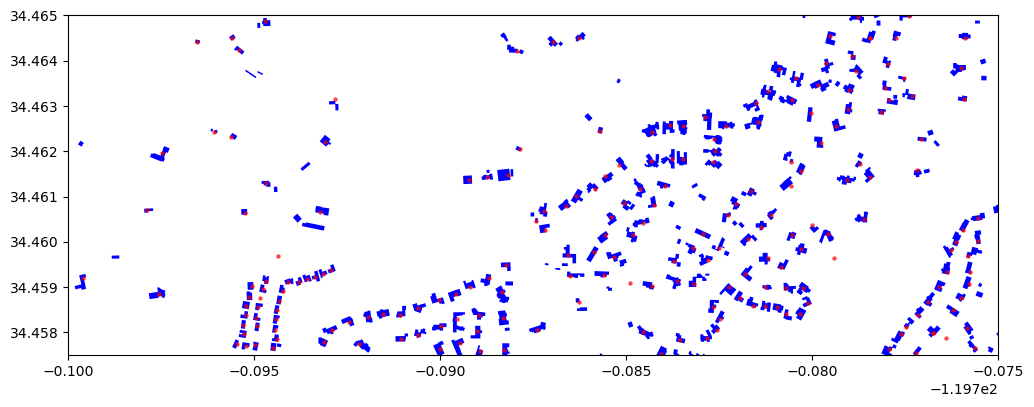

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
buildings.plot(ax=ax, color="blue", label="Buildings", linewidth=0.1)
inspections_2022.plot(ax=ax, color="red", alpha=0.6, markersize=5, label="Inspections")

# Set the x and y limits to zoom in
ax.set_ylim([34.4575, 34.4650])
ax.set_xlim([-119.80, -119.775])

plt.show()

Notice that the inspection points aren't all located on buildings. Therefore, we cannot simply create a buffer around each inspection point.